# Table of Contents
- [deephERG(authers model) Output Cleaning and Calcualtion](#section-1)
- [eos30gr Output cleaning and calculation](#section-2)
- [Compare both outputs and visualize analysis](#section-3)

##### the eos30gr and deephERG models are used to for prediction of hERG blockers of small molecules

<a id='section-1'></a>
### deephERG Output Cleaning and Calcualtion

- ##### I used the data avaliable (table_s7) which is the original output of the model that can be found  [here](https://pubs.acs.org/doi/10.1021/acs.jcim.8b00769)

In [9]:
#preview sample
import os
import pandas as pd
external_model_data = os.path.abspath('../data/Task2/Table_S7.csv')

#### Here I will clean the model by keeeping only 3 columns(InChiKey, smiles and probablity positive probablity)

In [13]:

#review the data and remove extra columns
import pandas as pd

# Read the CSV file
df = pd.read_csv(external_model_data)

# Drop the 'Name' and 'ATC category' columns
df = df.drop(['Name', 'ATC category', 'negative probability'], axis=1)

# Save the modified DataFrame to a new CSV file
df.to_csv('../data/Task2/cleaned_external_model_data.scv', index=False)


In [18]:
#validae column is removed
external_model_cleaned = os.path.abspath('../data/Task2/cleaned_external_model_data.scv')

# Read the CSV file
df = pd.read_csv(external_model_cleaned)

# List the column titles
column_titles = df.columns.tolist()

# Print the column titles
print("Column Titles:")
for title in column_titles:
    print(title)

Column Titles:
DrugBank ID
Smiles
Predicted negative probability
Predicted positive probability


### Now I will extract smiles from authors output

In [23]:
import pandas as pd

# Read the cleaned CSV file
df = pd.read_csv(external_model_cleaned)

# Extract the 'Smiles' column
smiles_df = df[['Smiles']]

# Save the 'Smiles' column to a new CSV file
smiles_df.to_csv('../data/Task2/input_reproductivity.csv', index=False)

<a id='section-2'></a>
### eos30gr output cleaning and calculation

In [27]:
#review the data
eos30gr_input = os.path.abspath('../data/Task2/eos30gr_model_data_reproduction.csv')

df = pd.read_csv(eos30gr_input, header=None, names=['Column1'])

# Display a preview of the DataFrame
print(df.head())


                                                                                           Column1
key                         input                                                       activity10
LQBVNQSMGBZMKD-UHFFFAOYSA-N Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3cc...  0.4405940594059406
KDGFLJKFZUIJMX-UHFFFAOYSA-N O1CCN(CC1)C1CCN(CC1)c1cc2c(cc1CC)C(=O)c1c([nH]c...  0.6237623762376238
DUYJMQONPNNFPI-UHFFFAOYSA-N O(C)c1cc(N(CCN(C)C)C)c(NC(=O)C=C)cc1Nc1nc(ccn1)...  0.4818481848184819
RWIVSVMMGFFZIJ-VWDRLOGHSA-N P(O)(O)(O)=O.P(O)(O)(O)=O.FC(F)(F)Oc1ccc(cc1)-c...  0.5247524752475248


<a id='section-3'></a>
#### Compare models table_S7 50 molecule output with eos30gr output

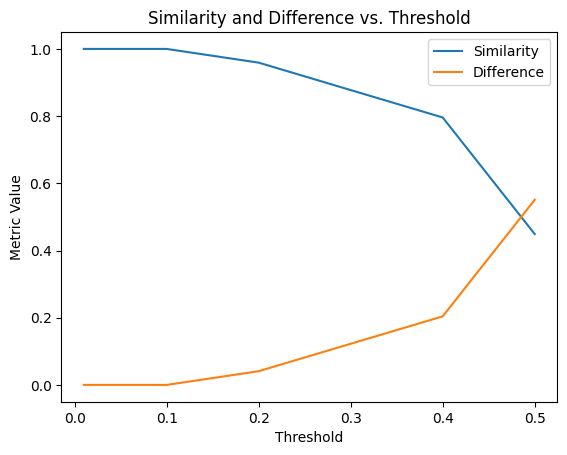

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

#add file location
deephERG_output = os.path.abspath('../data/Task2/cleaned_external_model_data.scv')
ersilia_output = os.path.abspath('../data/Task2/eos30gr_model_data_reproduction.csv')
# Read the two CSV files
df1 = pd.read_csv(deephERG_output)
df2 = pd.read_csv(ersilia_output)

# Iterate over different threshold values
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]
similarities = []
differences = []

for threshold in thresholds:
    # Compare the predicted positive probabilities
    pred1 = df1['Predicted positive probability'] >= threshold
    pred2 = df2['activity10'] >= threshold
    
    # Calculate similarity and difference
    similarity = (pred1 == pred2).mean()
    difference = 1 - similarity
    
    similarities.append(similarity)
    differences.append(difference)

# Plot the similarity and difference metrics
plt.plot(thresholds, similarities, label='Similarity')
plt.plot(thresholds, differences, label='Difference')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Similarity and Difference vs. Threshold')
plt.legend()
plt.savefig('../data/Similarity_Difference')
plt.show()

#### We can see that the two models outputs is really off so next I'll try calcualting based of closer threshold

In [30]:
df1 = pd.read_csv(deephERG_output)
df2 = pd.read_csv(ersilia_output)
# Iterate over different threshold values starting from 0.5 and below
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]
similarities = []

# Calculate similarity for each threshold
for threshold in thresholds:
    pred1 = df1['Predicted positive probability'] >= threshold
    pred2 = df2['activity10'] >= threshold
    similarity = (pred1 == pred2).mean()
    similarities.append(similarity)

# Find the threshold that maximizes similarity
best_threshold_index = similarities.index(max(similarities))
best_threshold = thresholds[best_threshold_index]

# Select the best threshold
pred1_best = df1['Predicted positive probability'] >= best_threshold
pred2_best = df2['activity10'] >= best_threshold

# Create a table of SMILES with their outcomes for both outputs at the best threshold
table_df = pd.DataFrame({
    'SMILES': df1['Smiles'],
    'Outcome First Model': pred1_best,
    'Outcome Second Model': pred2_best
})

# Display the table
print(f"Best Threshold: {best_threshold}")
print(table_df)

Best Threshold: 0.1
                                               SMILES  Outcome First Model  \
0   Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...                 True   
1   O1CCN(CC1)C1CCN(CC1)c1cc2c(cc1CC)C(=O)c1c([nH]...                 True   
2   O(C)c1cc(N(CCN(C)C)C)c(NC(=O)C=C)cc1Nc1nc(ccn1...                 True   
3   P(O)(O)(O)=O.P(O)(O)(O)=O.FC(F)(F)Oc1ccc(cc1)-...                 True   
4   OC/1=Nc2cc(ccc2\C\1=C(\Nc1ccc(N(C(=O)CN2CCN(CC...                 True   
5   Clc1cnc(nc1Nc1ccccc1S(=O)(=O)C(C)C)Nc1cc(C)c(c...                 True   
6   O(c1ccc(cc1)-c1nn(c2ncnc(N)c12)[C@@H]1CCCN(C1)...                 True   
7        P(OCCCCCCCCCCCCCCCC)(OCC[N+](C)(C)C)(=O)[O-]                 True   
8   Clc1cc(Nc2ncnc3c2cc(NC(=O)\C=C\CN(C)C)c(O[C@H]...                 True   
9   s1c(c(nc1C(C)(C)C)-c1cccc(NS(=O)(=O)c2c(F)cccc...                 True   
10  FC(F)(F)c1cc(NC(=O)c2cc(C#Cc3n4N=CC=Cc4nc3)c(c...                 True   
11  Clc1ccc(NC(=O)Nc2ccc(Oc3cc(ncc3)C(=O)NC)

#### despite having similar values at threshold 0.1 its not useful since I will instead check accuracy on threshold 0.5

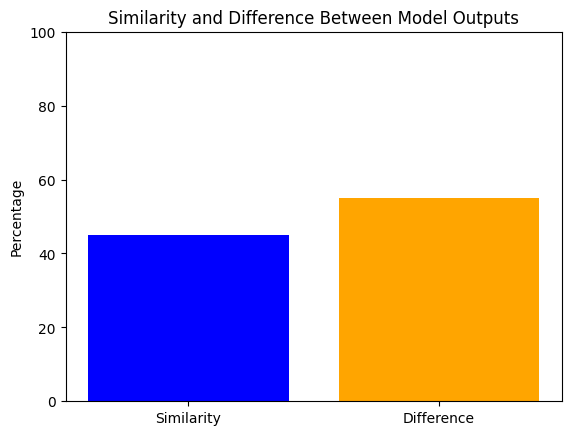

In [36]:
# Calculate similarity and difference for each row
similarity_count = 0
difference_count = 0
total_count = len(df1)  

for i in range(total_count):
    pred1 = df1.loc[i, 'Predicted positive probability'] >= 0.5
    pred2 = df2.loc[i, 'activity10'] >= 0.5
    
    if (pred1 == pred2).all():
        similarity_count += 1
    else:
        difference_count += 1

# Calculate similarity and difference percentages
similarity_percentage = (similarity_count / total_count) * 100
difference_percentage = (difference_count / total_count) * 100

# Plot the results
labels = ['Similarity', 'Difference']
percentages = [similarity_percentage, difference_percentage]

plt.bar(labels, percentages, color=['blue', 'orange'])
plt.ylabel('Percentage')
plt.title('Similarity and Difference Between Model Outputs')
plt.ylim(0, 100)
plt.show()

###### I was planning to plaot the AUC-ROC but since the test data for the model could not be found i decidied to plot the AUC-ROC for the third task using eos30gr test data, for now i will just comare result from 
###### Instead i wil extracte the outcome (activity10) from ersila model and the predicted positive probablity from authors model in to one file (comparing_models.csv) and evaluate data


In [54]:
df1 = pd.read_csv(deephERG_output)
df2 = pd.read_csv(ersilia_output)
merged_df = pd.merge(df1[['smiles', 'Predicted positive probability']], df2[['smiles', 'activity10']], on='smiles', how='inner')

# Save the merged dataframe to a new CSV file
merged_df.to_csv('../data/Task2/comparison.csv', index=False)

In [55]:
#preview the data holding both models output
merged_output = os.path.abspath('../data/Task2/comparison.csv')
merged_df = pd.read_csv(merged_output)

# Display the first few rows
print(merged_df.head())

                                              smiles  \
0  Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...   
1  O1CCN(CC1)C1CCN(CC1)c1cc2c(cc1CC)C(=O)c1c([nH]...   
2  O(C)c1cc(N(CCN(C)C)C)c(NC(=O)C=C)cc1Nc1nc(ccn1...   
3  P(O)(O)(O)=O.P(O)(O)(O)=O.FC(F)(F)Oc1ccc(cc1)-...   
4  OC/1=Nc2cc(ccc2\C\1=C(\Nc1ccc(N(C(=O)CN2CCN(CC...   

   Predicted positive probability  activity10  
0                           0.835    0.440594  
1                           0.941    0.623762  
2                           0.871    0.481848  
3                           0.934    0.524752  
4                           0.661    0.485149  


#### Here I want to check if thert are any simliar output with out adding any threshold

In [56]:
# Iterate over each row in the DataFrame and check if ther are any similar outputs
for index, row in merged_df.iterrows():
    # Check if 'activity10' and 'Predicted positive probability' are similar
    if row['activity10'] == row['Predicted positive probability']:
        # Print the row with 'smiles', 'activity10', and 'Predicted positive probability'
        print(f"Smiles: {row['smiles']}, Activity10: {row['activity10']}, Predicted positive probability: {row['Predicted positive probability']}")

#### Above aboutput did not generate any output meaning no simiar output were printed, now I'll try to print output who are different just to double check

In [57]:
for index, row in merged_df.iterrows():
    # Check if 'activity10' and 'Predicted positive probability' are not similar
    if row['activity10'] != row['Predicted positive probability']:
        # Print the row with 'smiles', 'activity10', and 'Predicted positive probability'
        print(f"Smiles: {row['smiles']}, Activity10: {row['activity10']}, Predicted positive probability: {row['Predicted positive probability']}")

Smiles: Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3cc[nH]c3nc2)c(cc1)C(=O)NS(=O)(=O)c1cc([N+](=O)[O-])c(NCC2CCOCC2)cc1)(C)C, Activity10: 0.4405940594059406, Predicted positive probability: 0.835
Smiles: O1CCN(CC1)C1CCN(CC1)c1cc2c(cc1CC)C(=O)c1c([nH]c3cc(ccc13)C#N)C2(C)C, Activity10: 0.6237623762376238, Predicted positive probability: 0.941
Smiles: O(C)c1cc(N(CCN(C)C)C)c(NC(=O)C=C)cc1Nc1nc(ccn1)-c1c2c(n(c1)C)cccc2, Activity10: 0.4818481848184819, Predicted positive probability: 0.871
Smiles: P(O)(O)(O)=O.P(O)(O)(O)=O.FC(F)(F)Oc1ccc(cc1)-c1cccc(C(O)=Nc2ccc(nc2)N2C[C@H](O[C@H](C2)C)C)c1C, Activity10: 0.5247524752475248, Predicted positive probability: 0.934
Smiles: OC/1=Nc2cc(ccc2\C\1=C(\Nc1ccc(N(C(=O)CN2CCN(CC2)C)C)cc1)/c1ccccc1)C(OC)=O, Activity10: 0.4851485148514851, Predicted positive probability: 0.661
Smiles: Clc1cnc(nc1Nc1ccccc1S(=O)(=O)C(C)C)Nc1cc(C)c(cc1OC(C)C)C1CCNCC1, Activity10: 0.6592409240924093, Predicted positive probability: 0.611
Smiles: O(c1ccc(cc1)-c1nn(c2ncnc(N)c12)

##### Now I'll calculate the similartiy and difference between two models using threshold (0.5)

In [59]:
# Iterate over each row
for index, row in merged_df.iterrows():
    # Get the values of 'activity20' and 'Predicted positive probability'
    activity10 = row['activity10']
    predicted_probability = row['Predicted positive probability']
    
    # Compare the values based on the threshold
    if (activity10 < 0.5 and predicted_probability < 0.5) or (activity10 >= 0.5 and predicted_probability >= 0.5):
        # Values are considered similar, print the row
        print(f"Similar: SMILES: {row['smiles']}, activity20: {activity10}, Predicted positive probability: {predicted_probability}")
    else:
        # Values are not considered similar, print a message
        print(f"Notsimilar: SMILES: {row['smiles']}, activity20: {activity10}, Predicted positive probability: {predicted_probability}")

Notsimilar: SMILES: Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3cc[nH]c3nc2)c(cc1)C(=O)NS(=O)(=O)c1cc([N+](=O)[O-])c(NCC2CCOCC2)cc1)(C)C, activity20: 0.4405940594059406, Predicted positive probability: 0.835
Similar: SMILES: O1CCN(CC1)C1CCN(CC1)c1cc2c(cc1CC)C(=O)c1c([nH]c3cc(ccc13)C#N)C2(C)C, activity20: 0.6237623762376238, Predicted positive probability: 0.941
Notsimilar: SMILES: O(C)c1cc(N(CCN(C)C)C)c(NC(=O)C=C)cc1Nc1nc(ccn1)-c1c2c(n(c1)C)cccc2, activity20: 0.4818481848184819, Predicted positive probability: 0.871
Similar: SMILES: P(O)(O)(O)=O.P(O)(O)(O)=O.FC(F)(F)Oc1ccc(cc1)-c1cccc(C(O)=Nc2ccc(nc2)N2C[C@H](O[C@H](C2)C)C)c1C, activity20: 0.5247524752475248, Predicted positive probability: 0.934
Notsimilar: SMILES: OC/1=Nc2cc(ccc2\C\1=C(\Nc1ccc(N(C(=O)CN2CCN(CC2)C)C)cc1)/c1ccccc1)C(OC)=O, activity20: 0.4851485148514851, Predicted positive probability: 0.661
Similar: SMILES: Clc1cnc(nc1Nc1ccccc1S(=O)(=O)C(C)C)Nc1cc(C)c(cc1OC(C)C)C1CCNCC1, activity20: 0.6592409240924093, Predicted posi

In [62]:
# Initialize a counter
similar_count = 0

# Iterate over each row
for index, row in merged_df.iterrows():
    # Get the values of 'activity20' and 'Predicted positive probability'
    activity10 = row['activity10']
    predicted_probability = row['Predicted positive probability']
    
    # Compare the values based on the threshold
    if (activity10 < 0.5 and predicted_probability < 0.5) or (activity10 >= 0.5 and predicted_probability >= 0.5):
        # Values are considered similar, increment the counter
        similar_count += 1

# Output the count
total_rows = len(merged_df)

print(f"Outof {total_rows} Number of rows where 'activity10' and 'Predicted positive probability' are similar: {similar_count}")

Outof 49 Number of rows where 'activity10' and 'Predicted positive probability' are similar: 22


##### Visualizing output

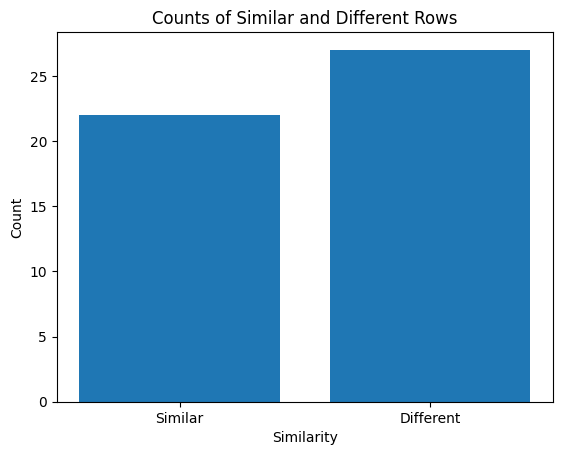

In [64]:
similar_count = ((merged_df['activity10'] < 0.5) & (merged_df['Predicted positive probability'] < 0.5) |
                 (merged_df['activity10'] >= 0.5) & (merged_df['Predicted positive probability'] >= 0.5)).sum()

# Count the number of rows where the values are different
different_count = len(merged_df) - similar_count

# Create a bar plot
plt.bar(['Similar', 'Different'], [similar_count, different_count])
plt.xlabel('Similarity')
plt.ylabel('Count')
plt.title('Counts of Similar and Different Rows')
plt.show()

#### Final Summary

    - We can conclude that there is a huge gap between the two models 
    - I did't get the test dataset used to train the deephERG model, Hence I could not calcualte  the AUC-ROC but we might need to retrain the ersilia model 